In [2]:
import pandas as pd
import numpy as np

file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
web_traffic_df = pd.read_excel(file_path, sheet_name='web_traffic_accounts')

"evobanco.com/cuenta-inteligente  modified URL"

In [2]:
web_traffic_df.rename(columns={"evobanco.com/cuenta-inteligente":"evobanco.com/cuenta-inteligente/"}, inplace=True)

web_traffic_df.head(5)

,Date,abanca.com/es/cuentas/cuenta-online,n26.com/es-es/cuenta-sin-comisiones,bancsabadell.com/cuenta-online,ing.es/cuenta-nocuenta-ing,bbva.es/personas/productos/cuentas/cuenta-online-sin-comisiones.html,revolut.com/es-ES/a-radically-better-account/,openbank.es/cuenta-ahorro-bienvenida,myinvestor.es/cuentas-tarjetas/cuentas,n26.com/es-es/cuenta-ahorro,bankinter.com/banca/cuentas-tarjetas/cuentas/cuenta-nomina,ing.es/cuenta-nocuenta-ing.1,evobanco.com/cuenta-inteligente/,bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones
0,2021-12-01,15202.983835,6664.368911,NaN,NaN,45449.486787,1343.418328,NaN,5319.608623,NaN,8733.560835,NaN,5055.542564,22325.885971
1,2022-01-01,42183.913207,5310.177360,NaN,NaN,38306.464983,1531.016801,NaN,6577.851993,NaN,11410.593443,NaN,4539.012047,28331.245044
2,2022-02-01,34498.153115,5547.588971,NaN,NaN,40978.325821,1304.591257,NaN,4031.716960,NaN,8891.661053,NaN,6049.457905,23798.819170
3,2022-03-01,34546.319021,4900.271300,NaN,NaN,43970.545627,1105.180575,NaN,4941.009311,NaN,7446.925144,NaN,9826.193608,24808.561729
4,2022-04-01,40508.288420,4909.581023,NaN,NaN,40782.451956,1020.968713,NaN,5774.734455,NaN,10285.861726,NaN,5028.236254,24739.758729


In [3]:
web_traffic_df = web_traffic_df.reset_index(drop=True)
# Melting the DataFrame
long_web_traffic_df = web_traffic_df.melt(id_vars=['Date'], var_name='URL', value_name='Web Traffic')


# Ensure no 'index' labels incorrectly positioned
print(long_web_traffic_df.head(5))

        Date                                  URL   Web Traffic
0 2021-12-01  abanca.com/es/cuentas/cuenta-online  15202.983835
1 2022-01-01  abanca.com/es/cuentas/cuenta-online  42183.913207
2 2022-02-01  abanca.com/es/cuentas/cuenta-online  34498.153115
3 2022-03-01  abanca.com/es/cuentas/cuenta-online  34546.319021
4 2022-04-01  abanca.com/es/cuentas/cuenta-online  40508.288420


In [4]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
bank_df = pd.read_excel(file_path, sheet_name='account_products')

bank_df.drop(columns=['Unnamed: 0'], inplace=True)
bank_df.head(5)

,account product,bank,url - bank product information
0,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones
1,Cuenta Online Sabadell,Banc Sabadell,bancsabadell.com/cuenta-online
2,Cuenta Clara Abanca,ABANCA,abanca.com/es/cuentas/cuenta-online
3,Cuenta Inteligente Bienvenida Evo,EVO Banco,evobanco.com/cuenta-inteligente/
4,Cuenta No Cuenta,ING,ing.es/cuenta-nocuenta-ing


In [5]:
long_web_traffic_df['Date'] = pd.to_datetime(long_web_traffic_df['Date'])
bank_df.rename(columns={'url - bank product information':'URL'},inplace=True)

long_web_traffic_df['URL'] = long_web_traffic_df['URL'].str.strip()
bank_df['URL'] = bank_df['URL'].str.strip()

web_traffic_merged_df = pd.merge(
    bank_df, 
    long_web_traffic_df, 
    how='left', 
    on=['URL']
)

display(web_traffic_merged_df.head(5)), web_traffic_merged_df['account product'].value_counts()

,account product,bank,URL,Date,Web Traffic
0,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2021-12-01,6664.368911
1,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-01-01,5310.177360
2,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-02-01,5547.588971
3,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-03-01,4900.271300
4,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-04-01,4909.581023


(None,
 account product
 Cuenta N26                           25
 Cuenta Online Sabadell               25
 Cuenta Clara Abanca                  25
 Cuenta Inteligente Bienvenida Evo    25
 Cuenta No Cuenta                     25
 Cuenta Online Sin Comisiones         25
 Cuenta Revolut                       25
 Cuenta Online Nómina Santander       25
 Cuenta Nómina                        25
 Cuenta Nómina hasta 5% TAE           25
 Cuenta de Ahorro N26                 25
 Cuenta 2,5% MyInvestor               25
 Cuenta de Ahorro Bienvenida          25
 Name: count, dtype: int64)

In [6]:
web_traffic_merged_df['bank'].value_counts()

bank
N26                50
ING                50
Banc Sabadell      25
ABANCA             25
EVO Banco          25
BBVA               25
Revolut            25
Banco Santander    25
Bankinter          25
MyInvestor         25
Openbank           25
Name: count, dtype: int64

In [7]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/MS/Account Products.xlsx'
df = pd.read_excel(file_path, sheet_name='google_trends')

display(df.head(5))

,Date,Abanca,Santander,Sabadell,BBVA,Bankinter,CaixaBank,EVO Banco,N26,Openbank
0,2021-12-05,6,58,28,41,11,7,2,1,4
1,2021-12-12,8,71,38,49,13,7,3,1,4
2,2021-12-19,8,65,33,47,12,6,3,1,4
3,2021-12-26,9,68,36,47,12,6,3,1,5
4,2022-01-02,8,61,31,46,11,6,3,1,5


In [8]:
google_df = df.copy()
google_df['Date'] = pd.to_datetime(google_df['Date'])

# Set 'Date' as index
google_df.set_index('Date', inplace=True)

google_df.sort_index(inplace=True)

# Filter for dates before 2022-01-01
filtered_df = google_df.loc['2021-1-01':]

google_df = filtered_df

# Resample to monthly frequency and aggregate data
monthly_google_df = google_df.resample('M').sum()  # Use sum, mean, or other aggregation function

# Reset index to have 'Month' as a column
monthly_google_df.reset_index(inplace=True)

monthly_google_df= monthly_google_df.reset_index(drop=True)
# Melting the DataFrame
long_monthly_google_df = monthly_google_df.melt(id_vars=['Date'], var_name='bank name', value_name='google trend')

long_monthly_google_df['Date'] = pd.to_datetime(long_monthly_google_df['Date'])
#long_monthly_google_df.set_index('Date', inplace=True)

long_monthly_google_df.head(3)

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_10796\3576505576.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_google_df = google_df.resample('M').sum()  # Use sum, mean, or other aggregation function


,Date,bank name,google trend
0,2021-12-31,Abanca,31
1,2022-01-31,Abanca,39
2,2022-02-28,Abanca,29


In [9]:
long_monthly_google_df['bank name'].value_counts()

bank name
Abanca       25
Santander    25
Sabadell     25
BBVA         25
Bankinter    25
CaixaBank    25
EVO Banco    25
N26          25
Openbank     25
Name: count, dtype: int64

## Merge the banks, Web tarffic with Google Trend

In [10]:
web_traffic_merged_df.rename(columns={"bank":"bank_name"},inplace = True)
long_monthly_google_df.rename(columns={"bank name":"bank_name"},inplace=True)

In [11]:
# Convert the 'Date' columns to datetime format
web_traffic_merged_df['Date'] = pd.to_datetime(web_traffic_merged_df['Date'])

# Format the 'Date' columns to "YYYY-MM"
long_monthly_google_df['Date'] = long_monthly_google_df['Date'].dt.to_period('M').dt.to_timestamp()
web_traffic_merged_df['Date'] = web_traffic_merged_df['Date'].dt.to_period('M').dt.to_timestamp()

print("Google Trends DataFrame:")
print(long_monthly_google_df.head(5))
print("\nWeb Traffic DataFrame:")
print(web_traffic_merged_df.head(5))

Google Trends DataFrame:
        Date bank_name  google trend
0 2021-12-01    Abanca            31
1 2022-01-01    Abanca            39
2 2022-02-01    Abanca            29
3 2022-03-01    Abanca            27
4 2022-04-01    Abanca            27

Web Traffic DataFrame:
  account product bank_name                                  URL       Date  \
0      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2021-12-01   
1      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-01-01   
2      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-02-01   
3      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-03-01   
4      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-04-01   

   Web Traffic  
0  6664.368911  
1  5310.177360  
2  5547.588971  
3  4900.271300  
4  4909.581023  


In [12]:
bank_name_mapping = {
    'N26': 'N26',
    'ING': 'ING',
    'Banc Sabadell': 'Sabadell',
    'ABANCA': 'Abanca',
    'EVO Banco': 'EVO Banco',
    'BBVA': 'BBVA',
    'Revolut': 'Revolut', # This one doesn't have a match in the provided Google Trends data, might need to check
    'Banco Santander': 'Santander',
    'Bankinter': 'Bankinter',
    'MyInvestor': None, # This one doesn't have a match in the provided Google Trends data
    'Openbank': 'Openbank'
}

In [13]:
# Apply the mapping dictionary to the long_monthly_google_df
long_monthly_google_df['bank_name'] = long_monthly_google_df['bank_name'].map(bank_name_mapping)
# Filter out rows with None values after mapping
long_monthly_google_df = long_monthly_google_df.dropna(subset=['bank_name'])

# Merge the DataFrames on 'bank_name' and 'Date'
merged_df = pd.merge(web_traffic_merged_df, long_monthly_google_df, on=['bank_name', 'Date'])

# Set index for panel data
#merged_df.set_index(['account product', 'Date'], inplace=True)
# Optional: Sort the DataFrame by the index
#merged_df.sort_index(inplace=True)

print("\nMerged DataFrame:")
print(merged_df[[ 'Web Traffic', 'google trend']])


Merged DataFrame:
      Web Traffic  google trend
0     6664.368911             4
1     5310.177360             5
2     5547.588971             4
3     4900.271300             4
4     4909.581023             4
..            ...           ...
145  11585.968429            16
146   8604.217515            18
147  11373.377132            22
148  10553.927787            14
149  24651.811838            21

[150 rows x 2 columns]


#### As some bank product dont have web traffic until it's website was built. so we only work the product that contain web traffic

In [14]:
# Determine the earliest date in the DataFrame
start_date = merged_df['Date'].min()

# Identify bank products that have data from the start date
valid_products = merged_df[merged_df['Date'] == start_date]['account product'].unique()

# Filter out bank products that do not have data from the start date
filtered_df = merged_df[merged_df['account product'].isin(valid_products)]

# Set index for panel data
filtered_df.set_index(['account product', 'Date'], inplace=True)

# Sort the DataFrame by the index
filtered_df.sort_index(inplace=True)

print("Filtered DataFrame:")
print(filtered_df[['google trend', 'Web Traffic']])

Filtered DataFrame:
                                              google trend   Web Traffic
account product                   Date                                  
Cuenta Inteligente Bienvenida Evo 2021-12-01            11   5055.542564
                                  2022-01-01            14   4539.012047
                                  2022-02-01            12   6049.457905
                                  2022-03-01            12   9826.193608
                                  2022-04-01            11   5028.236254
...                                                    ...           ...
Cuenta de Ahorro N26              2023-08-01             7   9104.383956
                                  2023-09-01             7   7935.475920
                                  2023-10-01             7   8796.029984
                                  2023-11-01             5   9529.609109
                                  2023-12-01             7  12034.247890

[150 rows x 2 columns]


In [98]:
import numpy as np

# Load the regression_clean_data.csv file
regression_clean_data_path = f"D:\Hangze Wu\BSE\DSDM\semester3\Master Thesis\github_thesis\deloitte_digital_banking\deloitte_digital_banking\data\\final_regression_data.csv"
regression_clean_data = pd.read_csv(regression_clean_data_path)

regression_clean_data['Log_Web_Traffic'] = np.log1p(regression_clean_data['web_traffic'])
regression_clean_data['Log_incentive'] = np.log1p(regression_clean_data['incentive'])

regression_clean_data['date'] = pd.to_datetime(regression_clean_data['date'])

# Set index for panel data
regression_clean_data.set_index(['bank', 'date'], inplace=True)

# Sort the DataFrame by the index
regression_clean_data.sort_index(inplace=True)

regression_clean_data.head(3)

<>:4: SyntaxWarning: invalid escape sequence '\H'
<>:4: SyntaxWarning: invalid escape sequence '\H'
C:\Users\wuhangze\AppData\Local\Temp\ipykernel_43664\1061111810.py:4: SyntaxWarning: invalid escape sequence '\H'
  regression_clean_data_path = f"D:\Hangze Wu\BSE\DSDM\semester3\Master Thesis\github_thesis\deloitte_digital_banking\deloitte_digital_banking\data\\final_regression_data.csv"


web_traffic  number_of_employee  assets_under_management  \
bank   date                                                                    
abanca 2021-12-01  15202.983835                5946              72148000000   
       2021-12-01  15202.983835                5946              72148000000   
       2021-12-01  15202.983835                5946              72148000000   

                   number_of_branches  age  has_stores  founded_before_2000  \
bank   date                                                                   
abanca 2021-12-01                 690   13           1                    0   
       2021-12-01                 690   13           1                    0   
       2021-12-01                 690   13           1                    0   

                   cross_visitation  search_interest  rank  \
bank   date                                                  
abanca 2021-12-01          0.077994        17.652686   4.0   
       2021-12-01          0.077994        17.652686   4.0   
       2021-12-01          0.077994        17.652686   4.0   

                   category_best_salary_accounts_helmycash  \
bank   date                                                  
abanca 2021-12-01                                        0   
       2021-12-01                                        1   
       2021-12-01                                        0   

                   category_best_savings_accounts_helpmycash  incentive  apr  \
bank   date                                                                    
abanca 2021-12-01                                          0      150.0  0.0   
       2021-12-01                                          0      150.0  0.0   
       2021-12-01                                          1      150.0  0.0   

                   mentions  Log_Web_Traffic  Log_incentive  
bank   date                                                  
abanca 2021-12-01       1.0         9.629313        5.01728  
       2021-12-01       1.0         9.629313        5.01728  
       2021-12-01       1.0         9.629313        5.01728

In [99]:
filtered_df = regression_clean_data

In [100]:
# Check how many unique account products
unique_account_products = filtered_df.index.get_level_values('bank').nunique()
print(f"Number of unique account products: {unique_account_products}")

Number of unique account products: 11


### Fixed Effect: Web traffic = AR(1) + 12 months Dummies + Google trend

#### previous 2 Lag

In [112]:
# Ensure the DataFrame is sorted by account product and date
filtered_df = filtered_df.sort_index()

#filtered_df.drop(columns={"URL","bank_name"}, inplace=True)

# Create lagged variables for past 1 and 2 months of web traffic
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby(level=0)['Log_Web_Traffic'].shift(1)
filtered_df['Log_Web_Traffic_Lag2'] = filtered_df.groupby(level=0)['Log_Web_Traffic'].shift(2)
filtered_df['Log_Web_Traffic_Lag3'] = filtered_df.groupby(level=0)['Log_Web_Traffic'].shift(3)
filtered_df['Log_Web_Traffic_Lag4'] = filtered_df.groupby(level=0)['Log_Web_Traffic'].shift(4)

# Drop rows with NaN values resulting from the lag operation
filtered_df = filtered_df.dropna()

print("DataFrame with lagged variables:")
print(filtered_df.head(3))

DataFrame with lagged variables:
                    web_traffic  number_of_employee  assets_under_management  \
bank   date                                                                    
abanca 2022-02-01  34498.153115                5946              72148000000   
       2022-03-01  34546.319021                5946              72148000000   
       2022-03-01  34546.319021                5946              72148000000   

                   number_of_branches  age  has_stores  founded_before_2000  \
bank   date                                                                   
abanca 2022-02-01                 690   13           1                    0   
       2022-03-01                 690   13           1                    0   
       2022-03-01                 690   13           1                    0   

                   cross_visitation  search_interest  rank  ...  Month_5  \
bank   date                                                 ...            
abanca 2022-02-01 

#### 12 Month Dummies

In [102]:
# Extract month from the Date index and create dummy variables
filtered_df['Month'] = filtered_df.index.get_level_values('date').month
monthly_dummies = pd.get_dummies(filtered_df['Month'], prefix='Month', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
filtered_df = pd.concat([filtered_df, monthly_dummies], axis=1)

print("DataFrame with monthly dummy variables:")
display(filtered_df.head(3))


DataFrame with monthly dummy variables:


web_traffic  number_of_employee  assets_under_management  \
bank   date                                                                    
abanca 2022-01-01  42183.913207                5946              72148000000   
       2022-01-01  42183.913207                5946              72148000000   
       2022-01-01  42183.913207                5946              72148000000   

                   number_of_branches  age  has_stores  founded_before_2000  \
bank   date                                                                   
abanca 2022-01-01                 690   13           1                    0   
       2022-01-01                 690   13           1                    0   
       2022-01-01                 690   13           1                    0   

                   cross_visitation  search_interest  rank  ...  Month_3  \
bank   date                                                 ...            
abanca 2022-01-01            0.0625        17.652686   4.0  ...    False   
       2022-01-01            0.0625        17.652686   4.0  ...    False   
       2022-01-01            0.0625        17.652686   4.0  ...    False   

                   Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
bank   date                                                               
abanca 2022-01-01    False    False    False    False    False    False   
       2022-01-01    False    False    False    False    False    False   
       2022-01-01    False    False    False    False    False    False   

                   Month_10  Month_11  Month_12  
bank   date                                      
abanca 2022-01-01     False     False     False  
       2022-01-01     False     False     False  
       2022-01-01     False     False     False  

[3 rows x 32 columns]

### ACF PACF , QQ plot

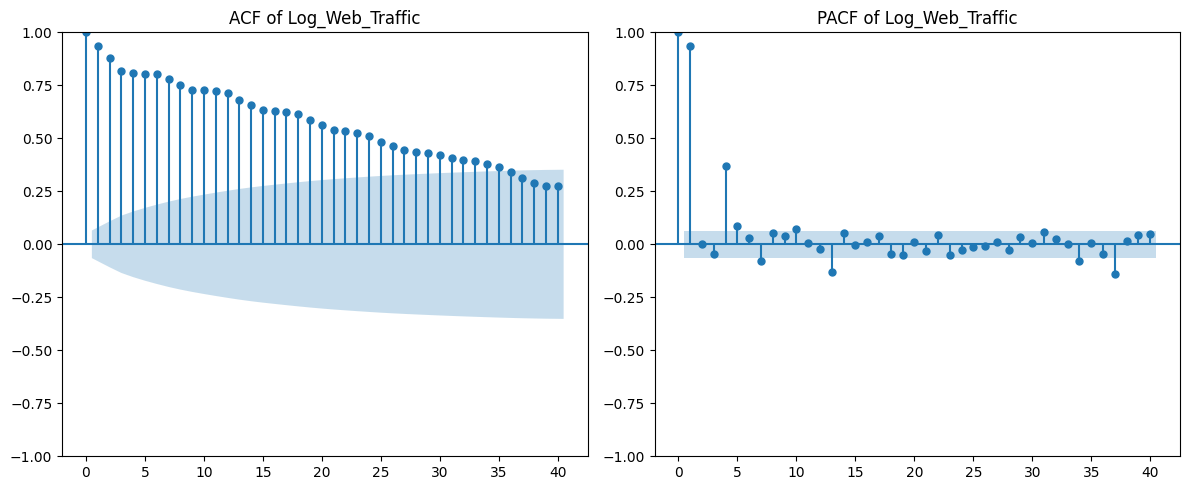

<Figure size 600x600 with 0 Axes>

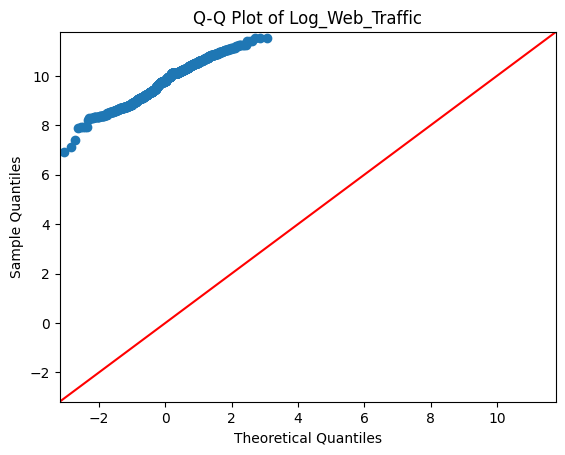

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Define the dependent variable and independent variables
filtered_df['Log_Web_Traffic'] = np.log1p(filtered_df['web_traffic'])

# Assuming 'Log_Web_Traffic_Lag1' is already calculated, if not calculate it first
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby('bank')['Log_Web_Traffic'].shift(1)

# Drop rows with missing values due to lag calculation
filtered_df = filtered_df.dropna()

# Ensure all independent variables are numeric
numeric_columns = ['Log_Web_Traffic_Lag1']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle any remaining missing values (optional)
filtered_df = filtered_df.dropna()

# Plotting ACF and PACF for Log_Web_Traffic
plt.figure(figsize=(12, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(filtered_df['Log_Web_Traffic'], lags=40, ax=plt.gca())
plt.title('ACF of Log_Web_Traffic')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(filtered_df['Log_Web_Traffic'], lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of Log_Web_Traffic')

plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
sm.qqplot(filtered_df['Log_Web_Traffic'], line ='45')
plt.title('Q-Q Plot of Log_Web_Traffic')
plt.show()


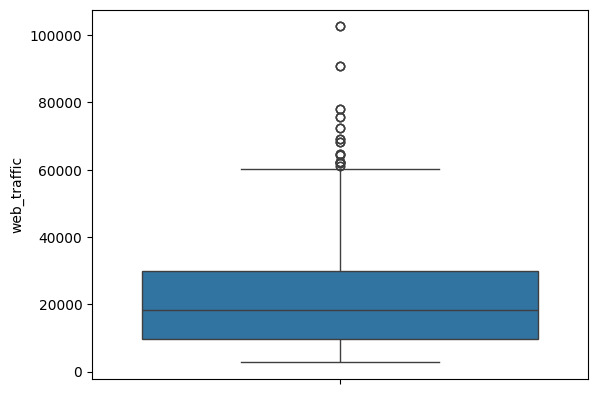

In [94]:
from scipy.stats import boxcox
import numpy as np

# Apply Box-Cox transformation
filtered_df['BoxCox_Web_Traffic'], _ = boxcox(filtered_df['web_traffic'] + 1)  # Adding 1 to avoid log(0)

### Check for Outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
sns.boxplot(filtered_df['web_traffic'])
plt.show()



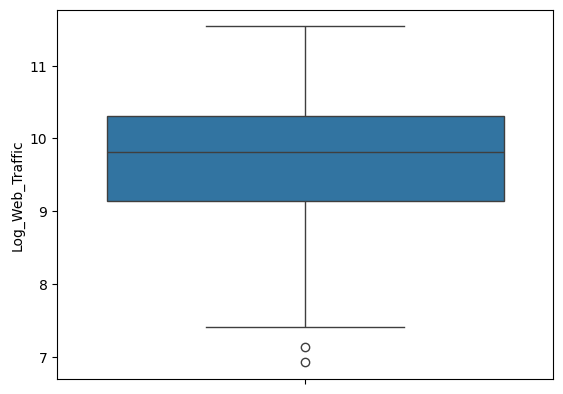

In [104]:
from scipy.stats import boxcox
import numpy as np

# Apply Box-Cox transformation
filtered_df['BoxCox_Web_Traffic'], _ = boxcox(filtered_df['Log_Web_Traffic'] + 1)  # Adding 1 to avoid log(0)

### Check for Outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
sns.boxplot(filtered_df['Log_Web_Traffic'])
plt.show()



In [97]:
import statsmodels.api as sm
from statsmodels.robust_linear_model import RLM

# Define the independent variables including the lagged web traffic
ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the robust regression model
robust_model = RLM(y, X).fit()

# Display the results
print(robust_model.summary())


ModuleNotFoundError: No module named 'statsmodels.robust_linear_model'

### Fixed Effect

In [113]:
ind_vars = ['cross_visitation', 'apr',
       'mentions']  #, 'rank', 'Log_incentive', 'search_interest'

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
#X = filtered_df[ind_vars+ ['Log_Web_Traffic_Lag1', 'Month_9']]
X = filtered_df[['Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2','Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.6621
Estimator:                   PanelOLS   R-squared (Between):              0.9702
No. Observations:                 862   R-squared (Within):               0.6621
Date:                Fri, Jun 21 2024   R-squared (Overall):              0.9101
Time:                        02:24:22   Log-likelihood                    207.78
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      414.95
Entities:                          11   P-value                           0.0000
Avg Obs:                       78.364   Distribution:                   F(4,847)
Min Obs:                       17.000                                           
Max Obs:                       192.00   F-statistic (robust):             414.95
                            

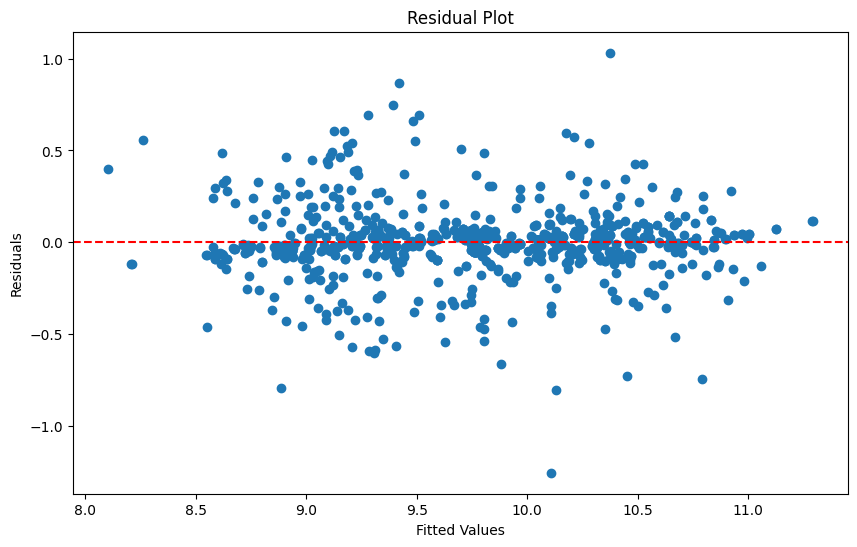

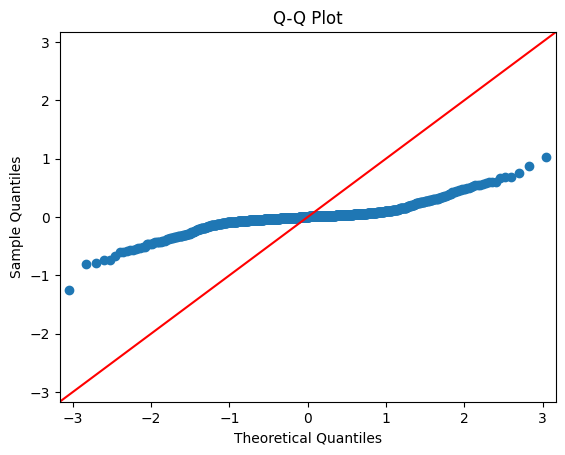

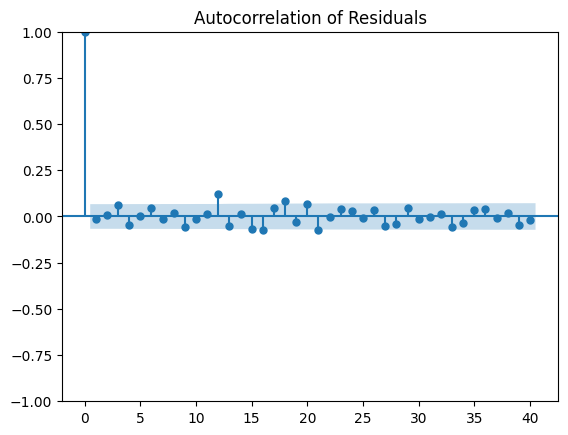

In [114]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


##### Fitted value is predicted value of dependent varibale 'web traffic'. It shows that, around 10,000 and 15,000 has highest predicted power that has smallest errors. 

In [132]:
ind_vars = [ 'apr', 'cross_visitation','rank'
       ]  #,'Log_incentive','mentions' ,  'search_interest'

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
time_series_vars =  ['Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2','Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']
seasonal_vars = ['Month_9']
X = filtered_df[time_series_vars + ind_vars + seasonal_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.6669
Estimator:                   PanelOLS   R-squared (Between):              0.9732
No. Observations:                 807   R-squared (Within):               0.6669
Date:                Fri, Jun 21 2024   R-squared (Overall):              0.9145
Time:                        03:02:56   Log-likelihood                    195.29
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      197.18
Entities:                          11   P-value                           0.0000
Avg Obs:                       73.364   Distribution:                   F(8,788)
Min Obs:                       12.000                                           
Max Obs:                       187.00   F-statistic (robust):             197.18
                            

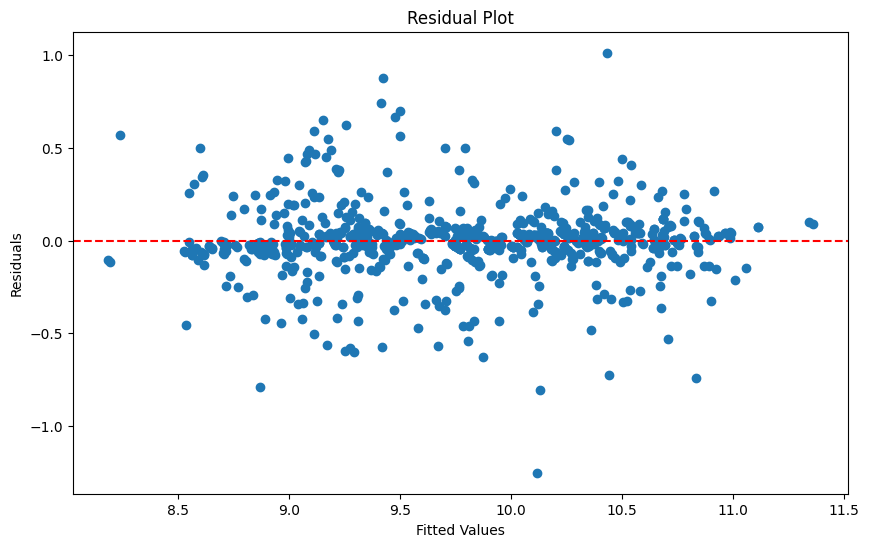

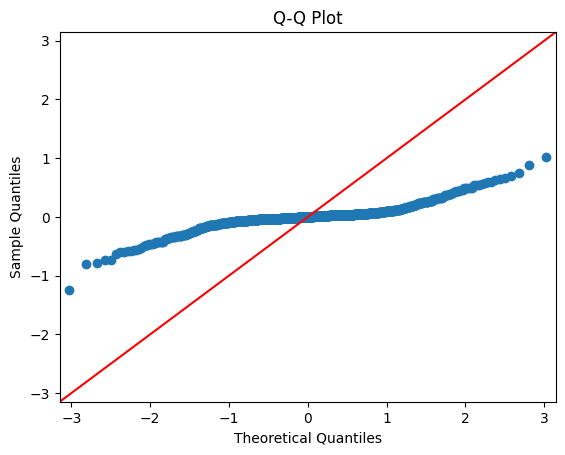

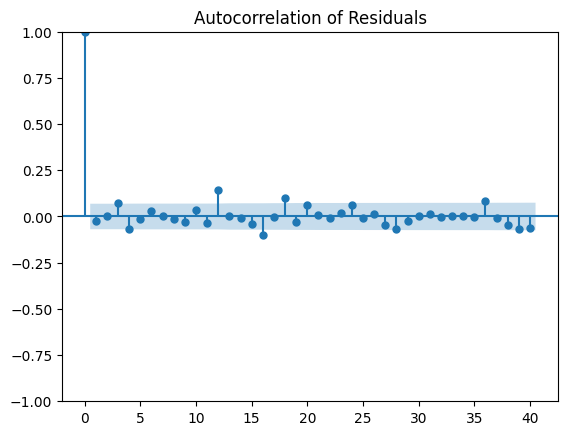

In [133]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


### ARIMA

In [131]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Perform Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(res.resids, res.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

# If heteroscedasticity is present, use robust standard errors
pooled_ols_model_robust = sm.OLS(y, X).fit(cov_type='HC3')
print(pooled_ols_model_robust.summary())

# Plot ACF and PACF of residuals to inspect for autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(res.resids, lags=40, ax=ax[0])
plot_pacf(res.resids, lags=40, ax=ax[1])
plt.show()

# Consider ARIMA or GLS models for better handling autocorrelation
# Example: Fit an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (p, d, q)
arima_model = ARIMA(y, order=(1, 0, 1), exog=X)
arima_res = arima_model.fit()
print(arima_res.summary())


TypeError: float() argument must be a string or a real number, not 'PanelData'

In [43]:
selected_columns = ['cross_visitation', 'Log_Web_Traffic', 'rank', 'apr', 'mentions','Log_incentive', 'search_interest', 'Log_Web_Traffic_Lag1']
filtered_df_selected = filtered_df[selected_columns]
filtered_df_selected

cross_visitation  Log_Web_Traffic      rank  apr  \
bank      date                                                           
abanca    2021-12-01          0.077994         9.629313  4.000000  0.0   
          2022-01-01          0.062500        10.649818  4.000000  0.0   
          2022-01-01          0.062500        10.649818  4.000000  0.0   
          2022-01-01          0.062500        10.649818  4.000000  0.0   
          2022-02-01          0.052288        10.448690  4.000000  0.0   
...                                ...              ...       ...  ...   
santander 2023-10-01          0.126347        10.508833  2.000000  0.0   
          2023-11-01          0.121212        10.474146  1.000000  0.0   
          2023-11-01          0.121212        10.474146  2.000000  0.0   
          2023-12-01          0.159196        10.278586  1.612903  0.0   
          2023-12-01          0.159196        10.278586  2.000000  0.0   

                      mentions  Log_incentive  search_interest  \
bank      date                                                   
abanca    2021-12-01       1.0       5.017280        17.652686   
          2022-01-01       1.0       5.017280        17.652686   
          2022-01-01       1.0       5.017280        17.652686   
          2022-01-01       1.0       5.017280        17.652686   
          2022-02-01       2.0       5.017280        17.643995   
...                        ...            ...              ...   
santander 2023-10-01       1.0       5.993961        68.000000   
          2023-11-01       2.0       5.993961        17.643995   
          2023-11-01       2.0       5.993961        17.643995   
          2023-12-01       1.0       5.993961        17.652686   
          2023-12-01       1.0       5.993961        17.652686   

                      Log_Web_Traffic_Lag1  
bank      date                              
abanca    2021-12-01              9.629313  
          2022-01-01              9.629313  
          2022-01-01             10.649818  
          2022-01-01             10.649818  
          2022-02-01             10.649818  
...                                    ...  
santander 2023-10-01             10.508833  
          2023-11-01             10.508833  
          2023-11-01             10.474146  
          2023-12-01             10.474146  
          2023-12-01             10.278586  

[928 rows x 8 columns]

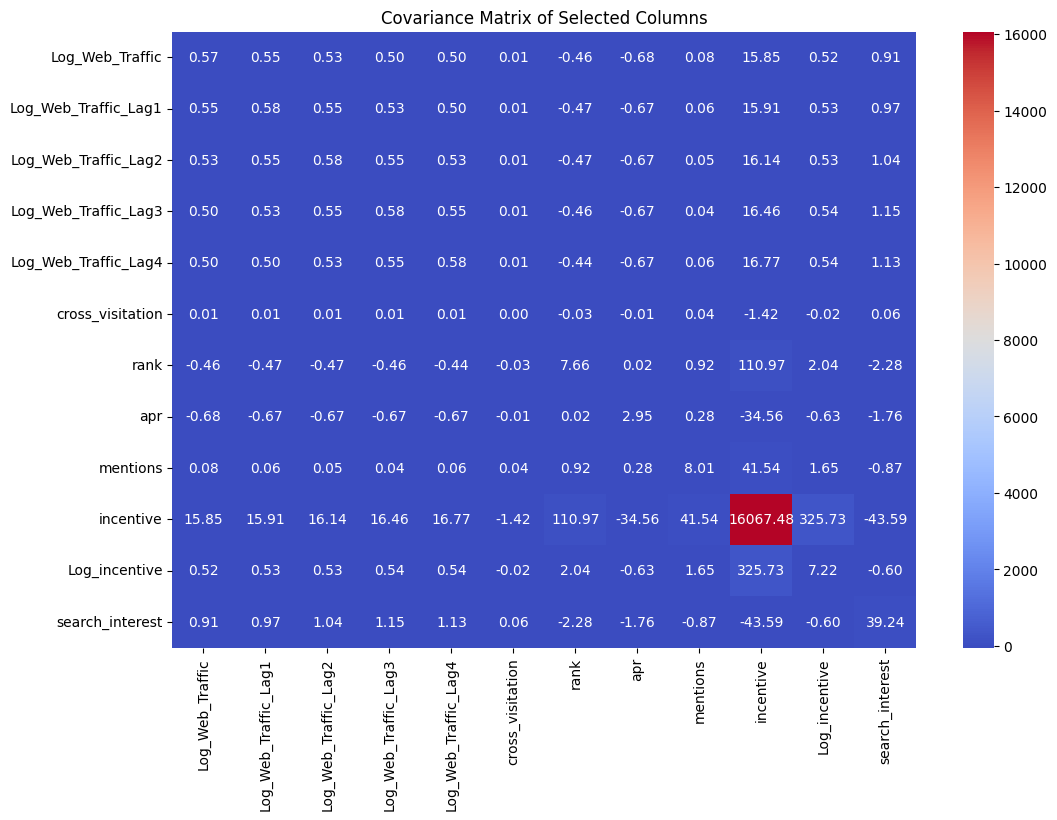

,Variance
Log_Web_Traffic,0.572742
Log_Web_Traffic_Lag1,0.575369
Log_Web_Traffic_Lag2,0.577262
Log_Web_Traffic_Lag3,0.579486
Log_Web_Traffic_Lag4,0.579388
cross_visitation,0.001534
rank,7.658276
apr,2.947636
mentions,8.013053
incentive,16067.481805


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the specific columns
interested_columns = ['cross_visitation', 'rank', 'apr', 'mentions','incentive','Log_incentive', 'search_interest']
time_sereis_column = ['Log_Web_Traffic', 'Log_Web_Traffic_Lag1', 'Log_Web_Traffic_Lag2', 'Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']


selected_columns = time_sereis_column + interested_columns
filtered_df_selected = filtered_df[selected_columns]

# Calculate the covariance matrix for the selected columns
cov_matrix = filtered_df_selected.cov()

# Calculate the mean, variance, skewness, and kurtosis for each selected column
means = filtered_df_selected.mean()
variances = filtered_df_selected.var()
skewness = filtered_df_selected.skew()
kurtosis = filtered_df_selected.kurtosis()

# Combine the four moments into a DataFrame
moments_df = pd.DataFrame({
    #'Mean': means,
    'Variance': variances,
    #'Skewness': skewness,
    #'Kurtosis': kurtosis
})

# Plot the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix of Selected Columns")
plt.show()

moments_df


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Define the dependent variable and independent variables
filtered_df['Log_Web_Traffic'] = np.log1p(filtered_df['web_traffic'])

# Assuming 'Log_Web_Traffic_Lag1' is already calculated, if not calculate it first
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby('bank')['Log_Web_Traffic'].shift(1)

# Drop rows with missing values due to lag calculation
filtered_df = filtered_df.dropna()

# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
numeric_columns = ['Log_Web_Traffic_Lag1']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)

# Handle any remaining missing values (optional)
filtered_df = filtered_df.dropna()

# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     9989.
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:41:23   Log-Likelihood:                 76.185
No. Observations:                 906   AIC:                            -148.4
Df Residuals:                     904   BIC:                            -138.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4911 

#### Explain
R2 is 0.914 explained the model variance. Adjusted R2 is also 0.914 explained model is not overfitted also.

F-stat = 9365 with 0 F-stat prob: explained that model is statistically significant overall.

The Durbin-Watson statistic is 2.002, which suggests that there is no autocorrelation in the residuals.
The Omnibus and Jarque-Bera (JB) tests indicate that there might be some deviations from normality in the residuals, as the p-values for both tests are 0.000.


In [122]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Define the dependent variable and independent variables
filtered_df['Log_Web_Traffic'] = np.log1p(filtered_df['web_traffic'])

# Assuming 'Log_Web_Traffic_Lag1' is already calculated, if not calculate it first
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby('bank')['Log_Web_Traffic'].shift(1)

# Drop rows with missing values due to lag calculation
filtered_df = filtered_df.dropna()

# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
numeric_columns = ['Log_Web_Traffic_Lag1']#,'cross_visitation']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)

# Handle any remaining missing values (optional)
filtered_df = filtered_df.dropna()

# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     8703.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:27:35   Log-Likelihood:                 76.552
No. Observations:                 807   AIC:                            -149.1
Df Residuals:                     805   BIC:                            -139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4466 

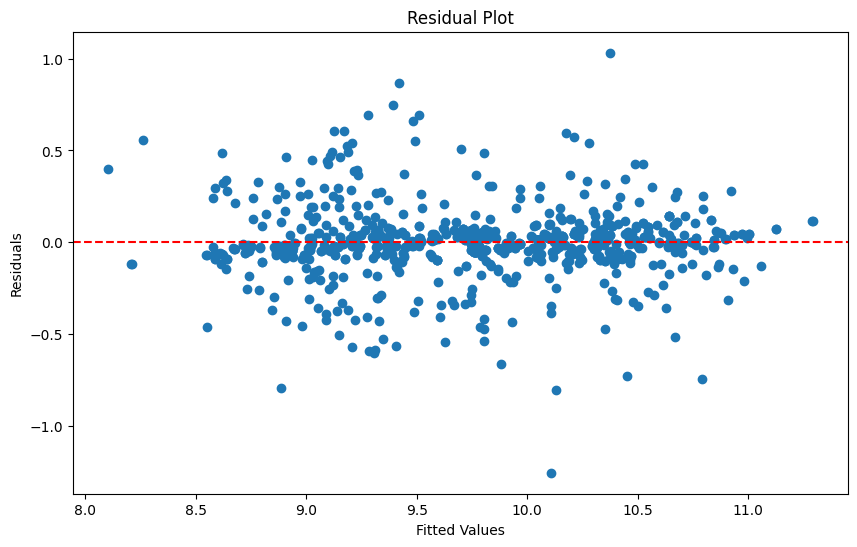

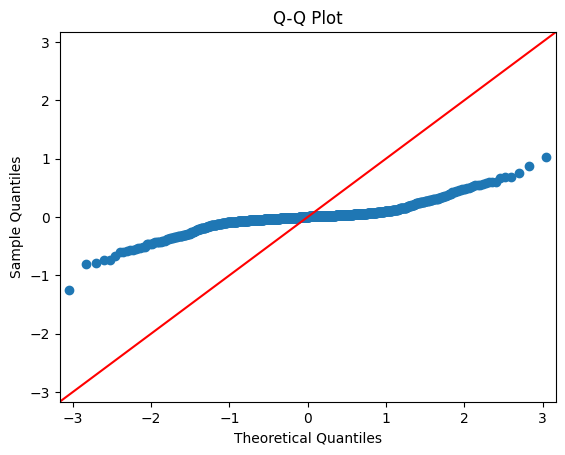

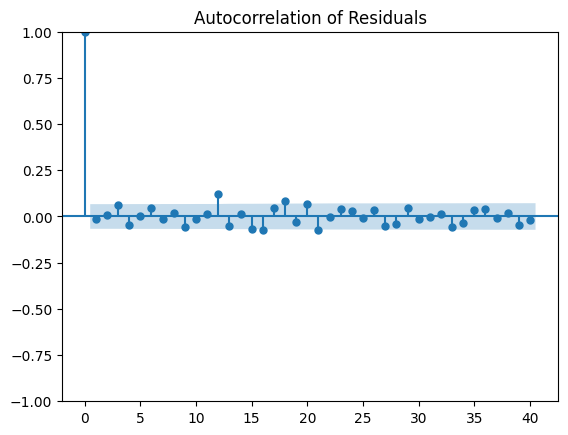

In [123]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Define the dependent variable and independent variables
filtered_df['Log_Web_Traffic'] = np.log1p(filtered_df['web_traffic'])

# Assuming 'Log_Web_Traffic_Lag1' is already calculated, if not calculate it first
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby('bank')['Log_Web_Traffic'].shift(1)

# Drop rows with missing values due to lag calculation
filtered_df = filtered_df.dropna()

# Ensure all independent variables are numeric

#numeric_columns = [, 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
numeric_columns = ['cross_visitation']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)

# Handle any remaining missing values (optional)
filtered_df = filtered_df.dropna()

# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     199.8
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           8.57e-41
Time:                        01:44:10   Log-Likelihood:                -854.45
No. Observations:                 829   AIC:                             1713.
Df Residuals:                     827   BIC:                             1722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.9353      0.064  

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Define the dependent variable and independent variables
filtered_df['Log_Web_Traffic'] = np.log1p(filtered_df['web_traffic'])

# Assuming 'Log_Web_Traffic_Lag1' is already calculated, if not calculate it first
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby('bank')['Log_Web_Traffic'].shift(1)

# Drop rows with missing values due to lag calculation
filtered_df = filtered_df.dropna()

# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', , 'Log_Web_Traffic_Lag1']
numeric_columns = ['search_interest']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)

# Handle any remaining missing values (optional)
filtered_df = filtered_df.dropna()

# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     30.42
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           4.71e-08
Time:                        01:47:22   Log-Likelihood:                -893.16
No. Observations:                 796   AIC:                             1790.
Df Residuals:                     794   BIC:                             1800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.3799      0.078    1

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Define the dependent variable and independent variables
filtered_df['Log_Web_Traffic'] = np.log1p(filtered_df['web_traffic'])

# Assuming 'Log_Web_Traffic_Lag1' is already calculated, if not calculate it first
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby('bank')['Log_Web_Traffic'].shift(1)

# Drop rows with missing values due to lag calculation
filtered_df = filtered_df.dropna()

# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', , 'Log_Web_Traffic_Lag1']
numeric_columns = ['search_interest','Log_Web_Traffic_Lag1']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)

# Handle any remaining missing values (optional)
filtered_df = filtered_df.dropna()

# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     4217.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:49:57   Log-Likelihood:                 71.296
No. Observations:                 785   AIC:                            -136.6
Df Residuals:                     782   BIC:                            -122.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4332 

                feature         VIF
0                 const  311.281726
1      cross_visitation    1.975552
2                  rank    1.288912
3             incentive    1.472468
4                   apr    1.444604
5              mentions    1.335564
6       search_interest    1.097269
7  Log_Web_Traffic_Lag1    1.862747


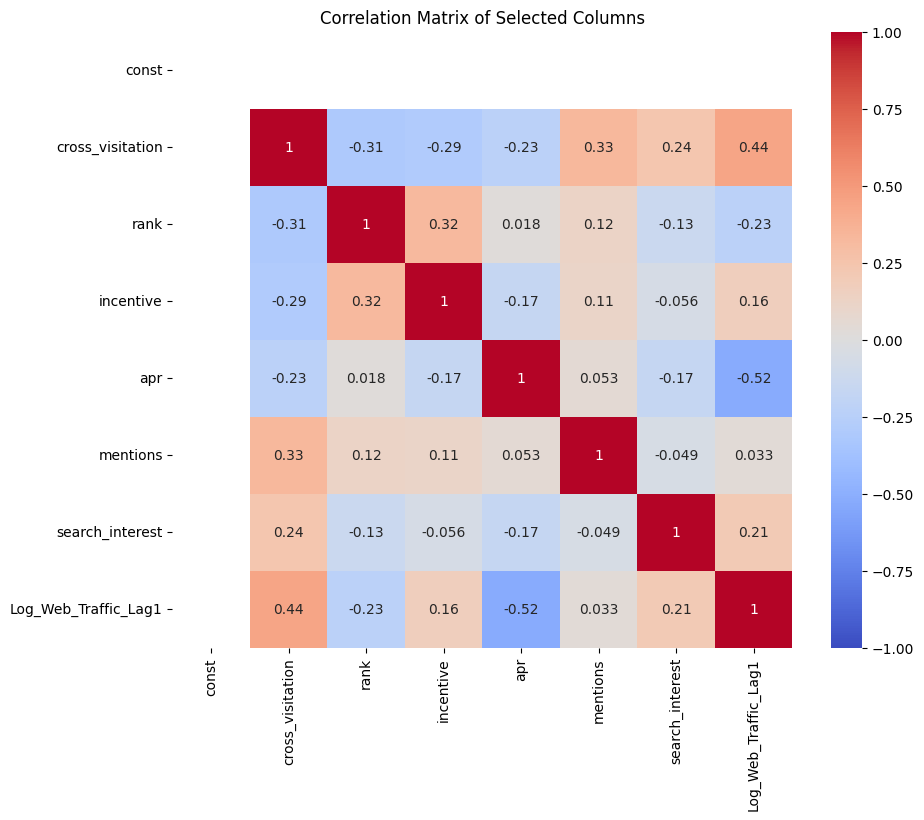

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1426.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:01:25   Log-Likelihood:                 78.442
No. Observations:                 785   AIC:                            -142.9
Df Residuals:                     778   BIC:                            -110.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7566 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming filtered_df is already defined and preprocessed

# Add a constant term to the model
X = sm.add_constant(filtered_df[['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Define the dependent variable and independent variables
filtered_df['Log_Web_Traffic'] = np.log1p(filtered_df['web_traffic'])

# Assuming 'Log_Web_Traffic_Lag1' is already calculated, if not calculate it first
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby('bank')['Log_Web_Traffic'].shift(1)

# Drop rows with missing values due to lag calculation
filtered_df = filtered_df.dropna()

# Ensure all independent variables are numeric
############# multicollinearity => 'search_interest',
numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions',  'Log_Web_Traffic_Lag1']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)

# Handle any remaining missing values (optional)
filtered_df = filtered_df.dropna()

# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1231.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:14:27   Log-Likelihood:                 83.822
No. Observations:                 774   AIC:                            -151.6
Df Residuals:                     766   BIC:                            -114.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7361 

                feature         VIF
0                 const  310.528886
1       search_interest    1.094827
2      cross_visitation    1.993335
3                  rank    1.291952
4             incentive    1.493574
5                   apr    1.450332
6              mentions    1.342054
7  Log_Web_Traffic_Lag1    1.863531


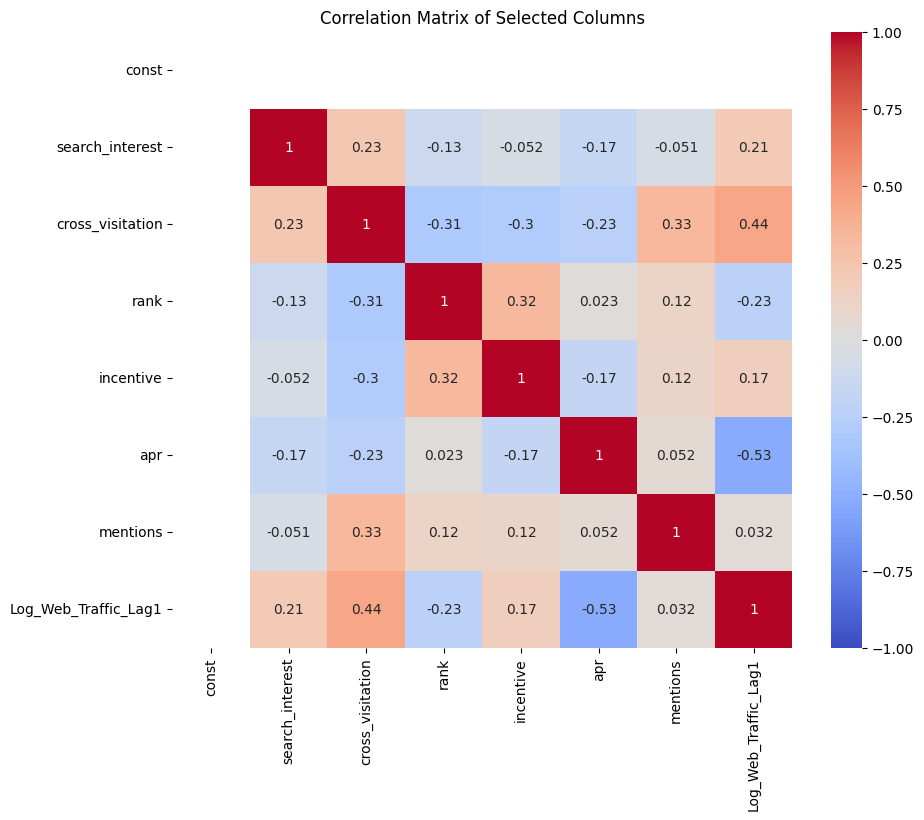

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1437.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:25:15   Log-Likelihood:                 83.548
No. Observations:                 774   AIC:                            -153.1
Df Residuals:                     767   BIC:                            -120.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7318 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming filtered_df is already defined and preprocessed

# Add a constant term to the model

### multicollinearity 
X = sm.add_constant(filtered_df[['search_interest','cross_visitation', 'rank', 'incentive', 'apr', 'mentions',  'Log_Web_Traffic_Lag1']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


                feature         VIF
0                 const  310.528886
1       search_interest    1.094827
2      cross_visitation    1.993335
3                  rank    1.291952
4             incentive    1.493574
5                   apr    1.450332
6              mentions    1.342054
7  Log_Web_Traffic_Lag1    1.863531


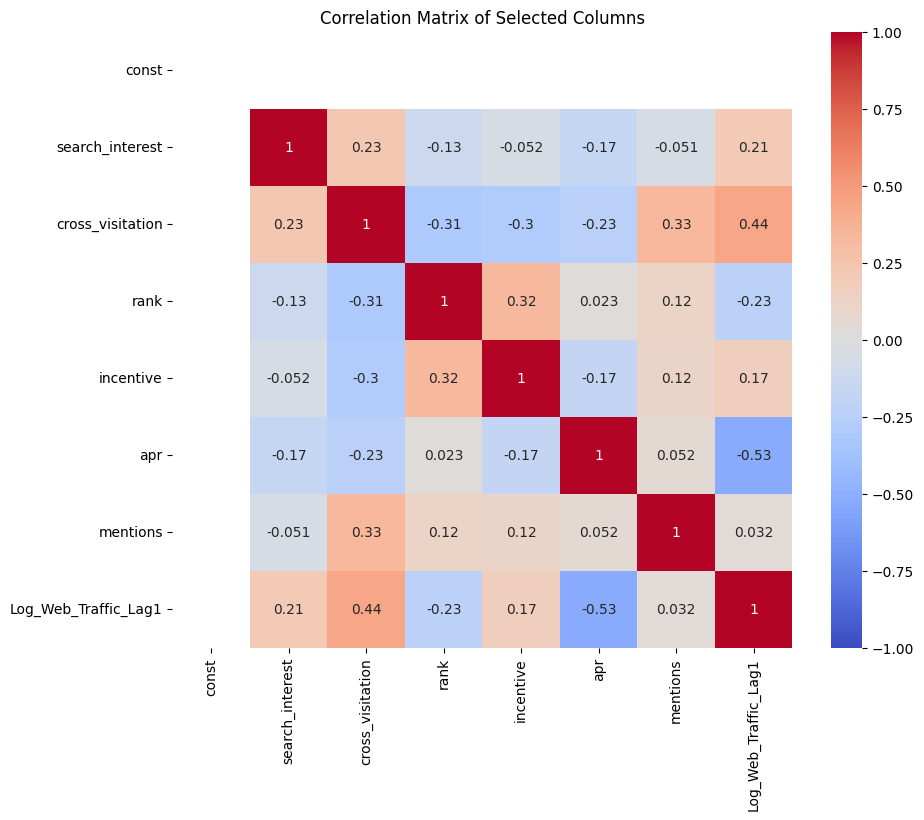

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1722.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:42:40   Log-Likelihood:                 82.582
No. Observations:                 774   AIC:                            -153.2
Df Residuals:                     768   BIC:                            -125.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6947 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

### multicollinearity 
X = sm.add_constant(filtered_df[['search_interest','cross_visitation', 'rank', 'incentive', 'apr', 'mentions',  'Log_Web_Traffic_Lag1']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest', 'incentive'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


## Standarized variables

In [134]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled
columns_to_scale = ['cross_visitation', 'rank', 'apr', 'incentive', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
filtered_df[columns_to_scale] = scaler.fit_transform(filtered_df[columns_to_scale])

# Define the independent variables including the lagged web traffic
ind_vars = columns_to_scale

# Add a constant term to the model
X = sm.add_constant(filtered_df[ind_vars])

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1261.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:52:48   Log-Likelihood:                 84.670
No. Observations:                 807   AIC:                            -153.3
Df Residuals:                     799   BIC:                            -115.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7832 

                feature       VIF
0                 const  1.000000
1       search_interest  1.094285
2      cross_visitation  1.943662
3                  rank  1.281132
4             incentive  1.458555
5                   apr  1.427860
6              mentions  1.318037
7  Log_Web_Traffic_Lag1  1.873709


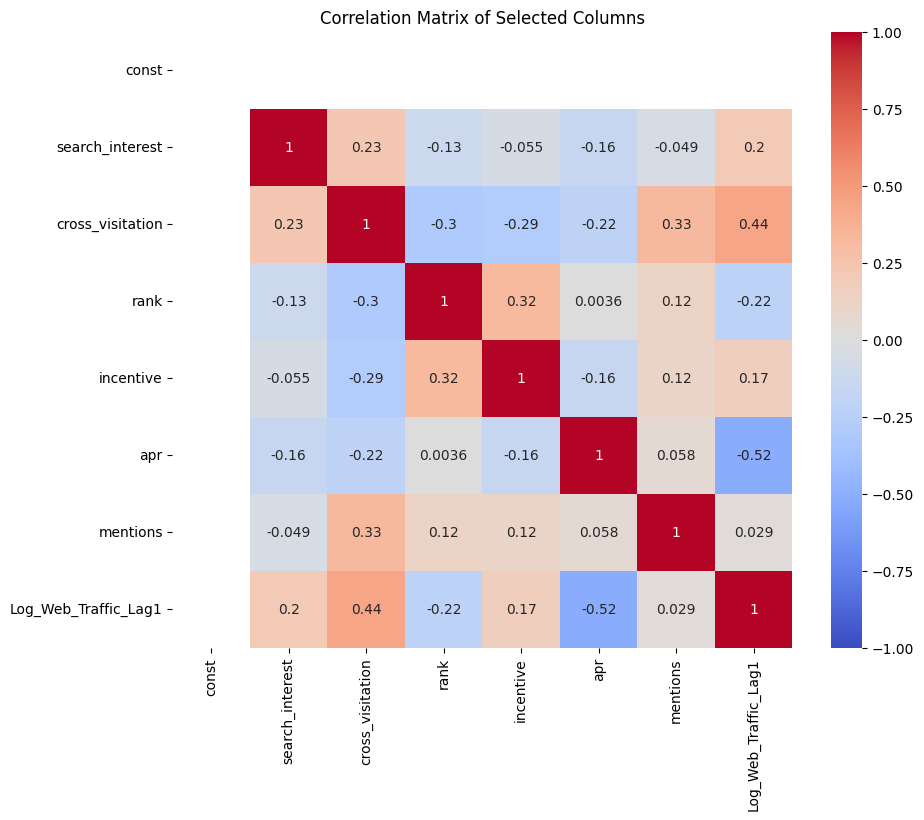

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1764.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:54:23   Log-Likelihood:                 83.251
No. Observations:                 807   AIC:                            -154.5
Df Residuals:                     801   BIC:                            -126.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7832 

In [135]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

### multicollinearity 
X = sm.add_constant(filtered_df[['search_interest','cross_visitation', 'rank', 'incentive', 'apr', 'mentions',  'Log_Web_Traffic_Lag1']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest', 'incentive'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


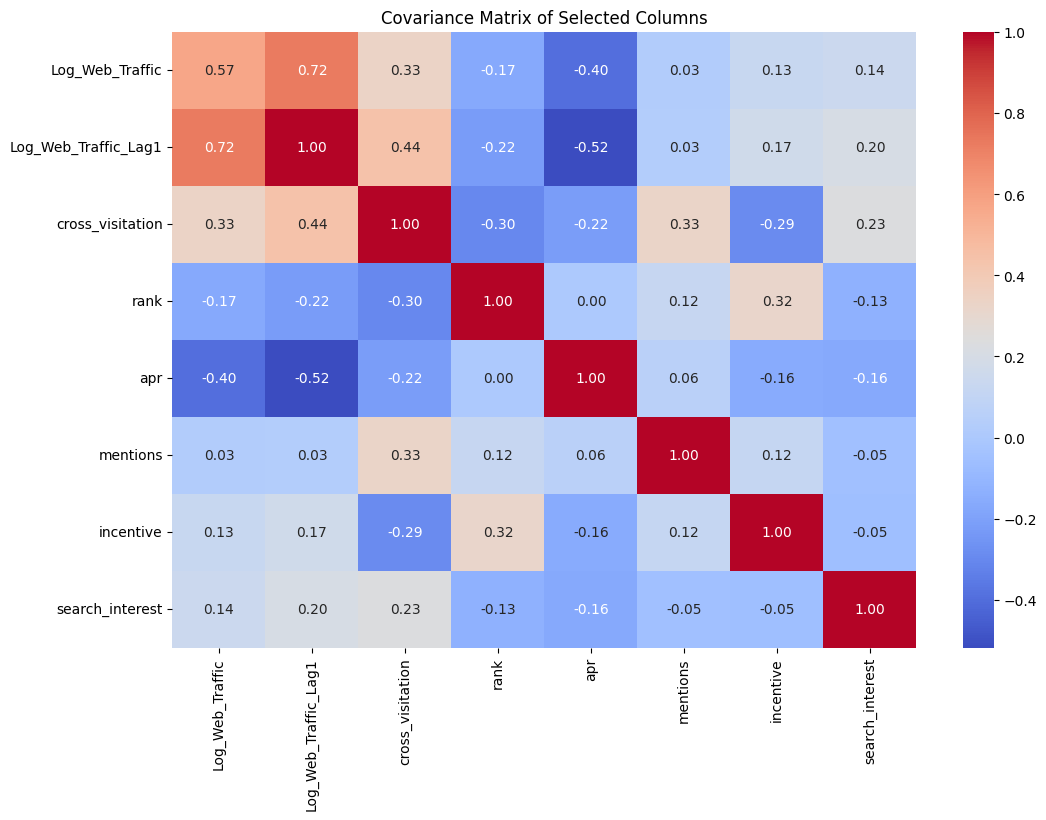

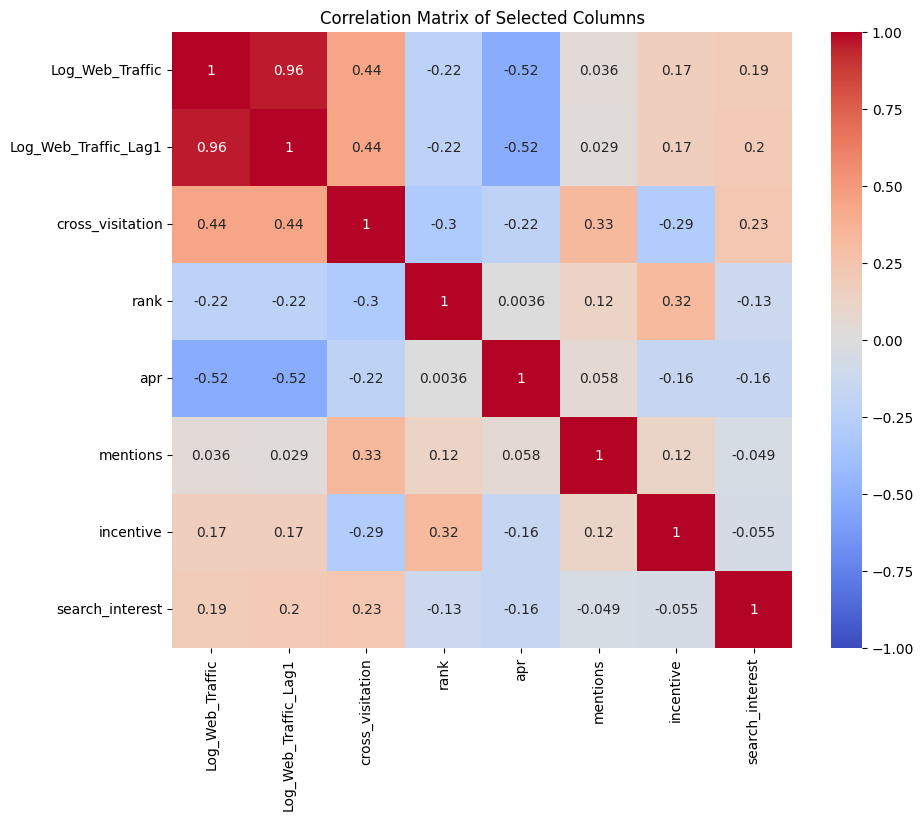

,Variance
Log_Web_Traffic,0.572742
Log_Web_Traffic_Lag1,1.001241
cross_visitation,1.001241
rank,1.001241
apr,1.001241
mentions,1.001241
incentive,1.001241
search_interest,1.001241


In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the specific columns
interested_columns = ['cross_visitation', 'rank', 'apr', 'mentions','incentive', 'search_interest'] #'Log_incentive',
time_sereis_column = ['Log_Web_Traffic', 'Log_Web_Traffic_Lag1']#, 'Log_Web_Traffic_Lag2', 'Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']


selected_columns = time_sereis_column + interested_columns
filtered_df_selected = filtered_df[selected_columns]

# Calculate the mean, variance, skewness, and kurtosis for each selected column
means = filtered_df_selected.mean()
variances = filtered_df_selected.var()
skewness = filtered_df_selected.skew()
kurtosis = filtered_df_selected.kurtosis()

# Combine the four moments into a DataFrame
moments_df = pd.DataFrame({
    #'Mean': means,
    'Variance': variances,
    #'Skewness': skewness,
    #'Kurtosis': kurtosis
})


# Calculate the covariance matrix for the selected columns
cov_matrix = filtered_df_selected.cov()

# Plot the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix of Selected Columns")
plt.show()


corr_matrix = filtered_df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()
moments_df


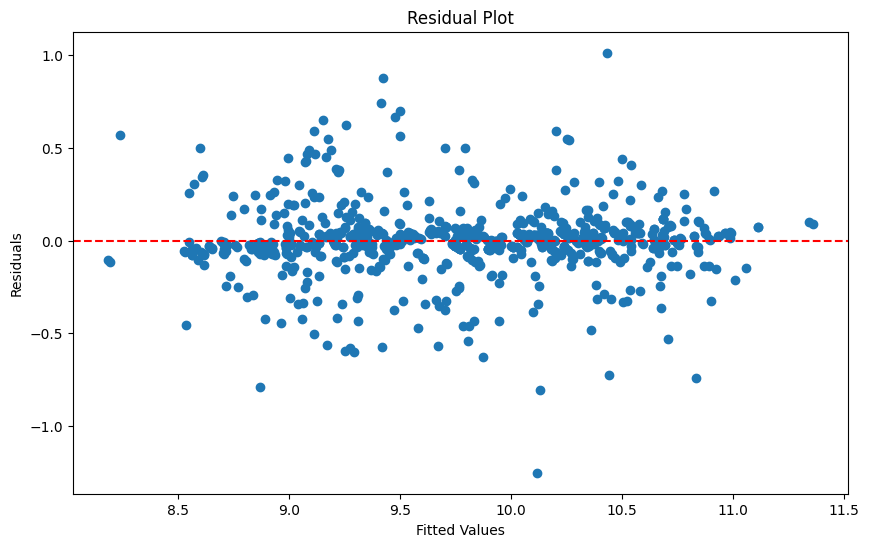

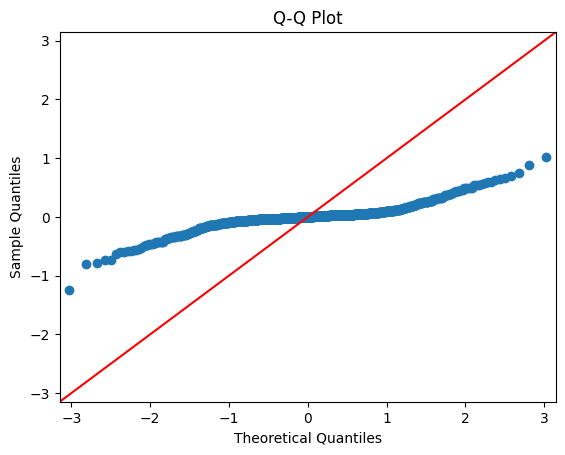

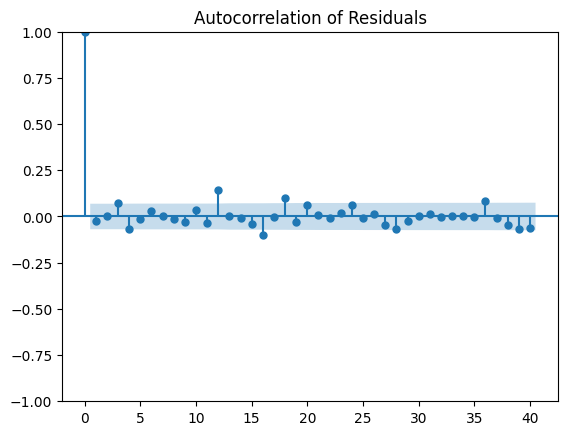

In [136]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


#### Starndarized Fixed Effect

In [140]:
ind_vars = [ 'apr', 'cross_visitation','rank'
       ,'Log_incentive','mentions' ,  'search_interest']

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
time_series_vars =  ['Log_Web_Traffic_Lag1']#,'Log_Web_Traffic_Lag2','Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']
seasonal_vars = ['Month_9']
X = filtered_df[time_series_vars + ind_vars + seasonal_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.5972
Estimator:                   PanelOLS   R-squared (Between):              0.9531
No. Observations:                 807   R-squared (Within):               0.5972
Date:                Fri, Jun 21 2024   R-squared (Overall):              0.8838
Time:                        04:18:45   Log-likelihood                    118.65
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      146.03
Entities:                          11   P-value                           0.0000
Avg Obs:                       73.364   Distribution:                   F(8,788)
Min Obs:                       12.000                                           
Max Obs:                       187.00   F-statistic (robust):             146.03
                            

#### Random Effect vs Fixed Effect

In [ ]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare

# Ensure your DataFrame is correctly formatted
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values introduced by the conversion
filtered_df = filtered_df.dropna()

# Define dependent and independent variables
y = filtered_df['Log_Web_Traffic']
ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_ Web Traffic_Lag1', 'Month_9']
X = filtered_df[ind_vars]
X = sm.add_constant(X)

# Fit the Fixed Effects Model
fixed_effects_model = PanelOLS(y, X, entity_effects=True)
fe_results = fixed_effects_model.fit()

# Fit the Random Effects Model
random_effects_model = RandomEffects(y, X)
re_results = random_effects_model.fit()

# Perform Hausman Test
comparison = compare({'Fixed Effects': fe_results, 'Random Effects': re_results})
print(comparison)

                         Model Comparison                        
                                Fixed Effects      Random Effects
-----------------------------------------------------------------
Dep. Variable                 Log_Web_Traffic     Log_Web_Traffic
Estimator                            PanelOLS       RandomEffects
No. Observations                          928                 928
Cov. Est.                          Unadjusted          Unadjusted
R-squared                              0.6264              0.9185
R-Squared (Within)                     0.6264              0.6054
R-Squared (Between)                    0.9615              0.9977
R-Squared (Overall)                    0.8920              0.9185
F-statistic                            190.48              1293.9
P-value (F-stat)                       0.0000              0.0000
=======================     =================   =================
const                                  2.0868              0.7933
          

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

# Define the dependent variable and independent variables
filtered_df['Log_Web_Traffic'] = np.log1p(filtered_df['web_traffic'])

# Assuming 'Log_Web_Traffic_Lag1' is already calculated, if not calculate it first
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby('bank')['Log_Web_Traffic'].shift(1)

# Drop rows with missing values due to lag calculation
filtered_df = filtered_df.dropna()

# Define the independent variables including the lagged web traffic
ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1', 'Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).